# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this projest I'm going to investigate and analyse TMDb movie dataset. TMDb movie dataset contains information about the movie database (TMDb).It also include information about the user rating and the movie cast and genre.

> Fot this data I have some question to ask like:
- Is the movie rating influence the revenue?
- Are higher budget movie get higher revinue?
- What other properties reflect the movies that have high revenues?

In [5]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I'm going to explore the dataset and check if any noise need to clean. 

### General Properties
> In this part I'm going to explore the data and understand it.

In [6]:
# Load data 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning 
> In this part I'm going to drop all the not needed columns.

In [9]:
# droping columns
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)


In [10]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

>**The genre have 23 missing values and becuase it is not a measure and it's not too much. So I'm going to drop the rows.**

In [11]:
df.dropna(inplace=True)

In [12]:
#Check if there is a duplicate data
df.duplicated().value_counts()

False    10842
True         1
dtype: int64

In [13]:
df[df.duplicated(subset=None, keep=False)]

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
2089,0.59643,30000000,967000,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010
2090,0.59643,30000000,967000,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010


> As we see above we have one duplicate data
Now I'm going to keep only the first occurrence.

In [30]:
df.drop_duplicates(subset=None, keep='first', inplace=True)
#check if the duplicate gone
df.duplicated().value_counts()

False    10842
dtype: int64

> Now I'm going to drop all zero revenues and budgets to not effects negatively on the analysis

In [39]:
df.drop(df[df.budget == 0].index, inplace=True)

In [40]:
df.drop(df[df.revenue == 0].index, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3854 non-null float64
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null object
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 331.2+ KB


>**Below the dataset after cleaning**

In [42]:
df.head()

,popularity,budget,revenue,original_title,runtime,genres,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


<a id='eda'></a>
## Exploratory Data Analysis

> In this step, I'm going to explore the data and relations more. Also, visualizing and answering the question that I asked above.


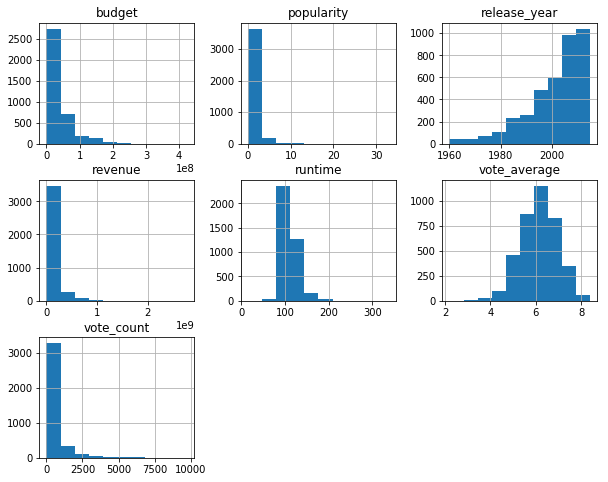

In [43]:
# explore the data.
df.hist(figsize=(10,8));

### Q1: Is the movie rating influence the revenue?

In [44]:
# Counting the revenue average 
revenue_ave = df['revenue'].mean()
revenue_ave

107686616.09807992

> **Now I wil divide the revenue into 2 section**
- Movies below or equal the avarage revenue. 
- Movies Above the avarage revenue.

In [45]:
higher_revenue = df['revenue'] > revenue_ave
lower_revenue = df['revenue'] <= revenue_ave

In [46]:
higher_revenue.value_counts()

False    2747
True     1107
Name: revenue, dtype: int64

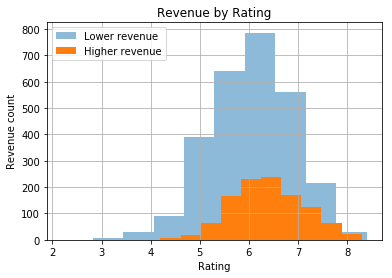

In [49]:
df.vote_average[lower_revenue].hist(alpha=0.5, label='Lower revenue')
df.vote_average[higher_revenue].hist(label='Higher revenue')
plt.title('Revenue by Rating')
plt.xlabel('Rating')
plt.ylabel('Revenue count')
plt.legend();


> **As we can see above the Lower revenue has no relevance how good the raiting is. But it may effect on the bad rating. So on the histogram, we can see that all the lower_revenue and higher_revenue are equal on the good rating but on the other hand approximately only the lower revenue who gets the low voting**

### Q2: Are higher budget movie get higher revinue?

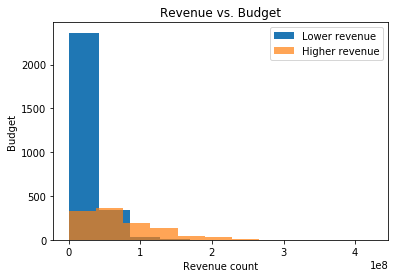

In [59]:
df.budget[lower_revenue].plot(kind='hist' ,label='Lower revenue')
df.budget[higher_revenue].plot(kind='hist' ,alpha=0.7 ,label='Higher revenue')
plt.title('Revenue vs. Budget')
plt.ylabel('Budget')
plt.xlabel('Revenue count')
plt.legend();


>**Unexpectedly the result shows that the movies that had a lower budget had more revenue.**

### Q3: What other properties reflect the movies that have high revenues?
> let's check other columns can effect the revenue

Text(0, 0.5, 'Revenue count')

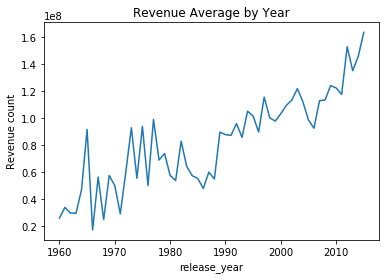

In [62]:
#check the average revenue for each year
df.groupby('release_year')['revenue'].mean().plot(kind='line');
plt.title('Revenue Average by Year')
plt.ylabel('Revenue count')


> The chart above shows that the revenue became higher in the latest years.

<a id='conclusions'></a>
## Conclusions

> In conclusion, after an investigation in TMDb movie dataset, we can assure that the budget would not impact the revenues so many movies have a small budget but got higher revenues.

> Good ratings will not effect the revenues too but the bad ratings will do.

> At last we can find that movies get higher revenues by years.

>**limitation:**
> The are some limitation in the dataset such as erroneous values on budget and revenue that effects a lot in the analysis so I had to drop many rows based on that. Although there are some missing values in some columns I did not need those columns in my analysis so dropping them was the best solution. 

> This dataset is not really an effective representation of the movies industry through to the huge number of missing values, those erroneous values in the data set.